# Section Two - Data Analysis and Comprehension

# 0. Imports
---

In [1]:
import warnings
import pandas                  as pd
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from matplotlib                import pyplot as plt
from IPython.core.display      import HTML
  
from sklearn.model_selection   import train_test_split, KFold
from sklearn.preprocessing     import LabelEncoder, PolynomialFeatures
from sklearn.ensemble          import RandomForestRegressor
from sklearn                   import linear_model
from sklearn                   import metrics
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, RFE

warnings.filterwarnings('ignore')

## 0.1. Helper Functions

In [2]:
# --- Jupyter Notebook Settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
df_raw = pd.read_csv( '../data/insurance.csv' )

    1. Identify Peek at Your Data
    2. Dimensions of Your Data
    3. Data Type For Each Attribute
    4. Descriptive Statistics
        4.1 Central Tendency
            4.1.1 Mean, Median, Mode
        4.2 Dispersion

# 1.0. Data preparation
---

## 1.1. Rename Attributes

In [5]:
df1 = df_raw.copy()

In [6]:
# new columns name
new_cols = ['age', 'gender', 'body_mass_index', 'num_children', 'is_smoker', 'region', 'insurance_cost']

# rename
df1.columns = new_cols

## 1.2. Format of Attributes

In [7]:
df1.dtypes

age                  int64
gender              object
body_mass_index    float64
num_children         int64
is_smoker           object
region              object
insurance_cost     float64
dtype: object

In [8]:
df1['body_mass_index'] = np.round( df1['body_mass_index'], 1 )
df1['insurance_cost'] = np.round( df1['insurance_cost'], 2 )

In [9]:
df1.head()

,age,gender,body_mass_index,num_children,is_smoker,region,insurance_cost
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# 2.0. Describe data
---

In [10]:
df2 = df1.copy()

## 2.1. Data Dimensions

In [11]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Columns: {}\n'.format( df2.shape[1] ) )

Number of Rows: 1338
Number of Columns: 7



## 2.2. Data Type Attributes

In [12]:
print( df2.dtypes )

age                  int64
gender              object
body_mass_index    float64
num_children         int64
is_smoker           object
region              object
insurance_cost     float64
dtype: object


## 2.3. Number of NA

In [13]:
df2.isna().sum()

age                0
gender             0
body_mass_index    0
num_children       0
is_smoker          0
region             0
insurance_cost     0
dtype: int64

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age                1338 non-null int64
gender             1338 non-null object
body_mass_index    1338 non-null float64
num_children       1338 non-null int64
is_smoker          1338 non-null object
region             1338 non-null object
insurance_cost     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 2.4. Descriptive Statistics 

In [15]:
# separate the categorical from numerical features
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64'] )

print( 'Num of Categorical: {}'.format( cat_attributes.shape[1] ) )
print( 'Num of Numerical: {}'.format( num_attributes.shape[1] ) )

Num of Categorical: 3
Num of Numerical: 4


### 2.4.1. Central Tendency and Dispersion

#### 2.4.1.1. Numerical Attributes

In [16]:
# Measure of Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( median ) ).T
ct3 = pd.DataFrame( num_attributes.apply( lambda x: x.mode() ) )

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T


m = pd.concat( [ct1, ct2, ct3, d1, d2, d3, d4, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'mean', 'median', 'mode', 'standard_deviation', 'min', 'max', 'range', 'kurtosis', 'skew']
print( m )

        attributes     mean   median     mode standard_deviation      min      max    range                                           kurtosis       skew
0              age   39.207       39       18            14.0447       18       64       46  <bound method Series.kurt of 0        0.000000...  0.0556725
1  body_mass_index  30.6633     30.4     27.6            6.09598       16     53.1     37.1  <bound method Series.kurt of 0        0.000000...   0.284551
2     num_children  1.09492        1        0            1.20504        0        5        5  <bound method Series.kurt of 0        0.000000...    0.93838
3   insurance_cost  13270.4  9382.03  1639.56            12105.5  1121.87  63770.4  62648.6  <bound method Series.kurt of 0        0.000000...    1.51588


In [17]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
body_mass_index,1338.0,30.663303,6.098257,16.00,26.3000,30.40,34.700,53.10
num_children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
insurance_cost,1338.0,13270.422280,12110.011259,1121.87,4740.2875,9382.03,16639.915,63770.43


#### 2.4.1.2. Categorical Attributes

In [18]:
c = pd.DataFrame( cat_attributes.apply( lambda x: x.unique().shape[0], axis=0 ).reset_index() )
c.columns = ['Columns Names', 'Number of Levels']
print( c )

  Columns Names  Number of Levels
0        gender                 2
1     is_smoker                 2
2        region                 4


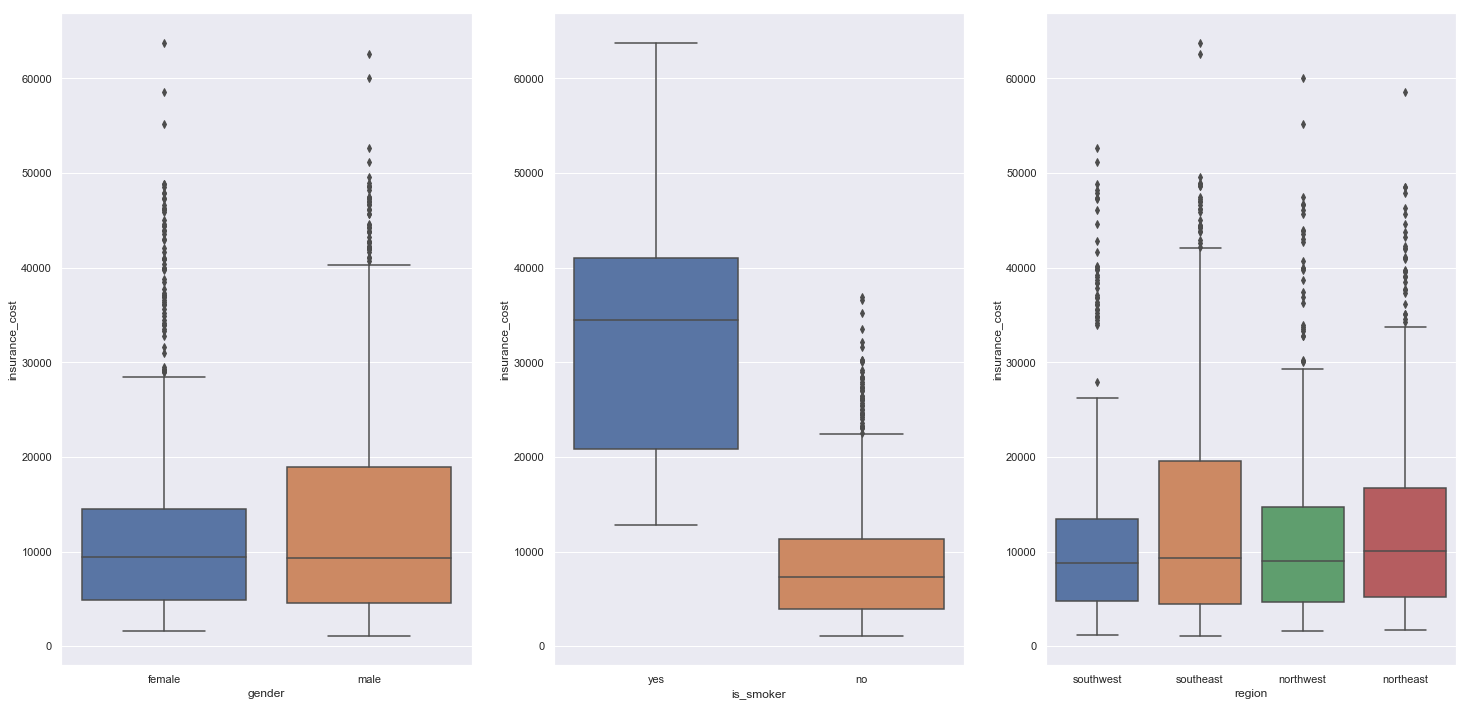

In [19]:
plt.subplot( 1, 3, 1 )
sns.boxplot( x='gender', y='insurance_cost', data=df2 );

plt.subplot( 1, 3, 2 )
sns.boxplot( x='is_smoker', y='insurance_cost', data=df2 );

plt.subplot( 1, 3, 3 )
sns.boxplot( x='region', y='insurance_cost', data=df2 );

# 3.0 EDA - Exploration Data Analysis <font color='red'> S02V02 - IMPLEMENT CLASS DISTRIBUTION AND CORRELATIONS </font>
---

In [20]:
df3 = df2.copy()

## 3.1. Univariate Analysis

## 3.1.1. Response Variable

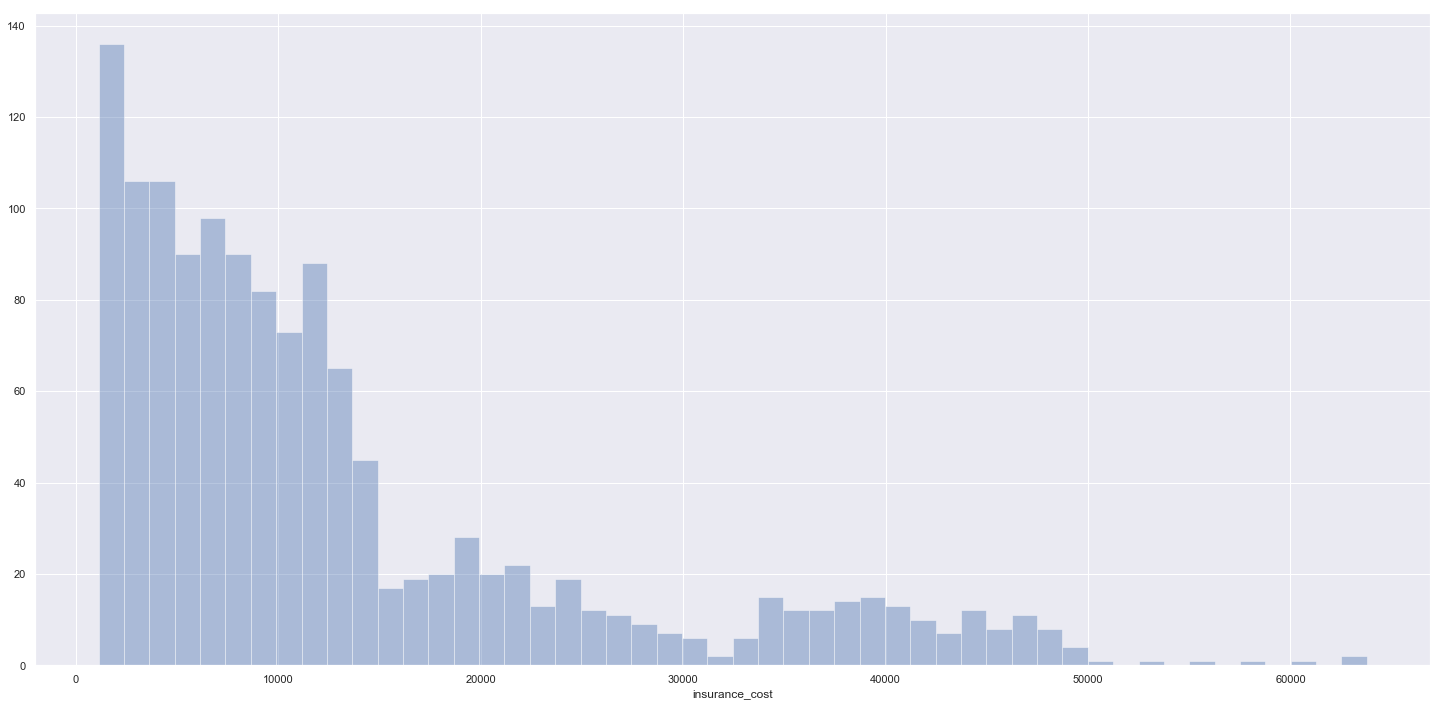

In [21]:
sns.distplot( df3['insurance_cost'], kde=False, bins=50 );

## 3.1.2. Numerical Predictors

### 3.1.2.1. Age

In [22]:
df3['age'].mode()

0    18
dtype: int64

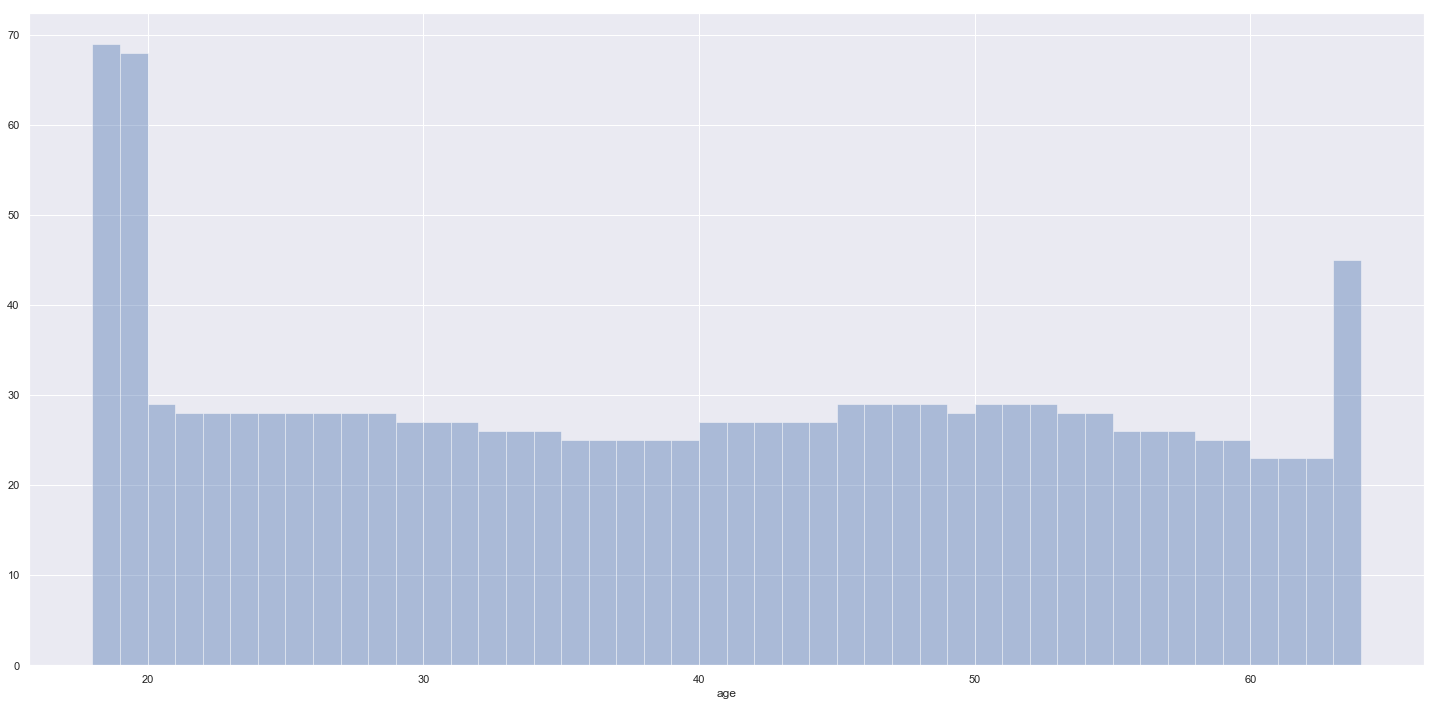

In [23]:
sns.distplot( df3['age'], kde=False, bins=46 );

### 3.1.2.2. Body Mass Index ( BMI )

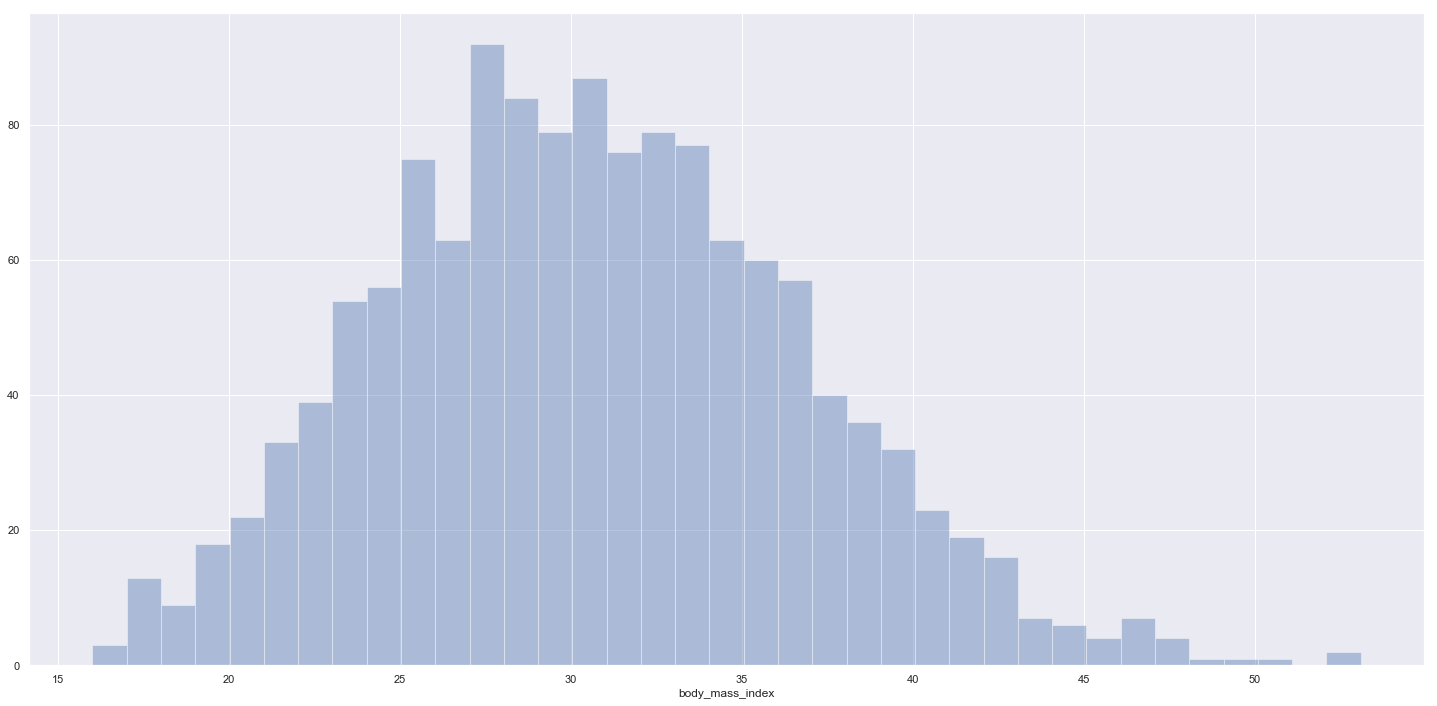

In [24]:
sns.distplot( df3['body_mass_index'], kde=False, bins=37 );

### 3.1.2.3. Number of Children

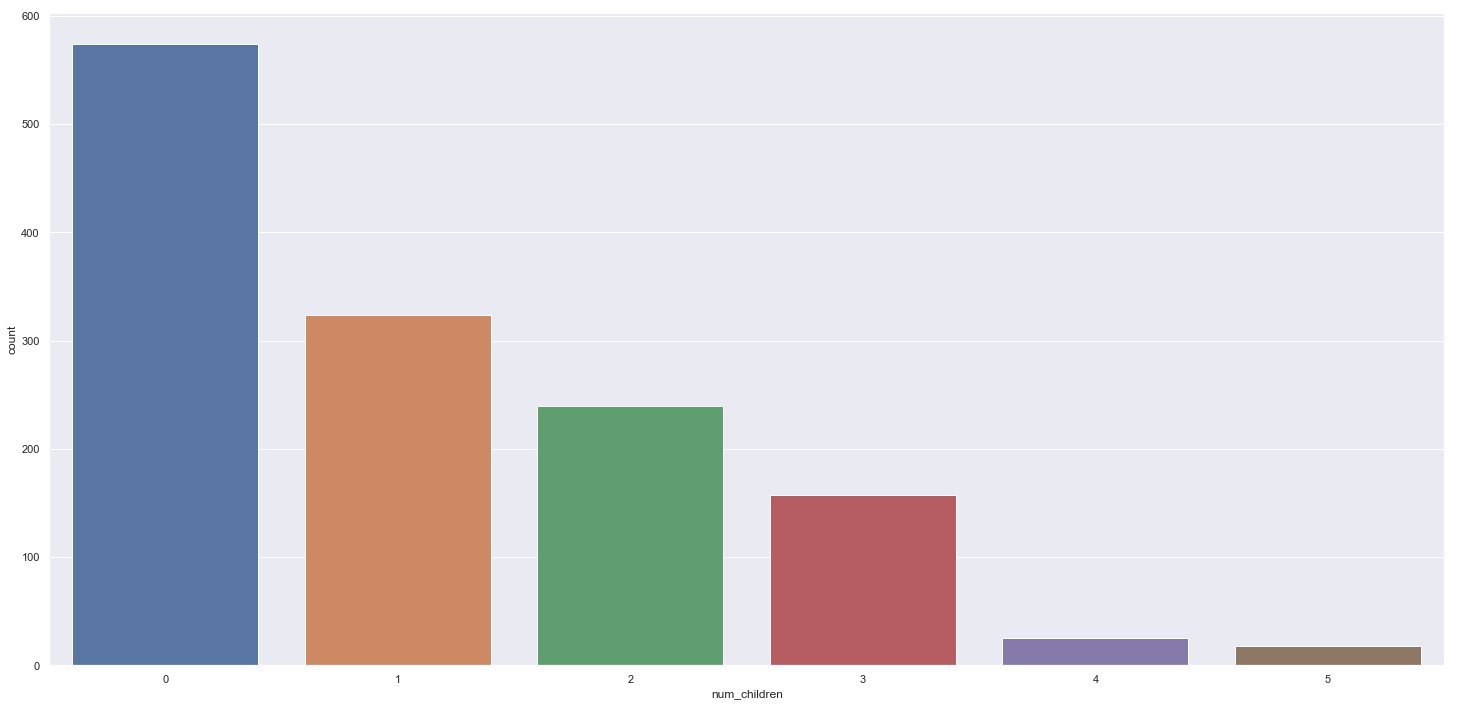

In [25]:
sns.countplot( x='num_children', data=df3 );

## 3.1.3. Categorical Predictors

### 3.1.3.1. Gender

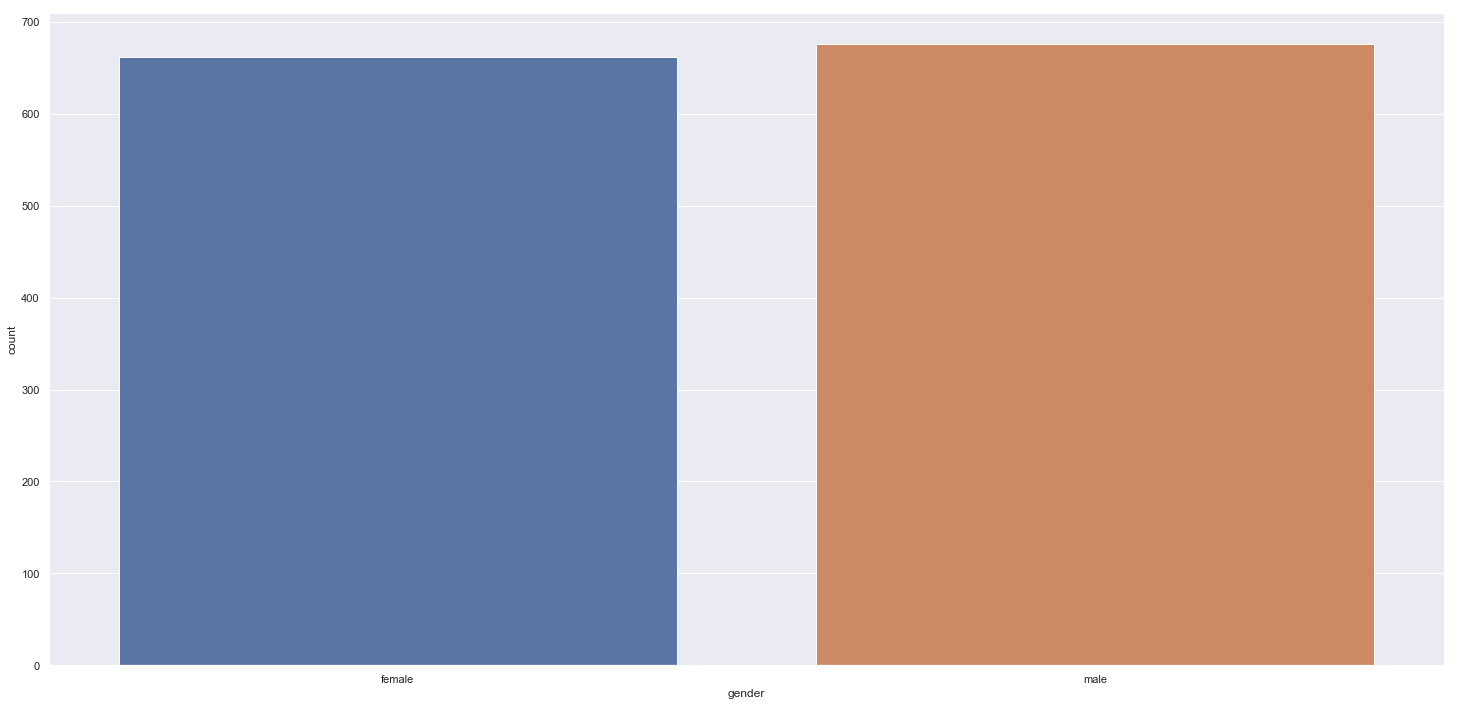

In [26]:
sns.countplot( x='gender', data=df3 );

### 3.1.3.2. Smoker

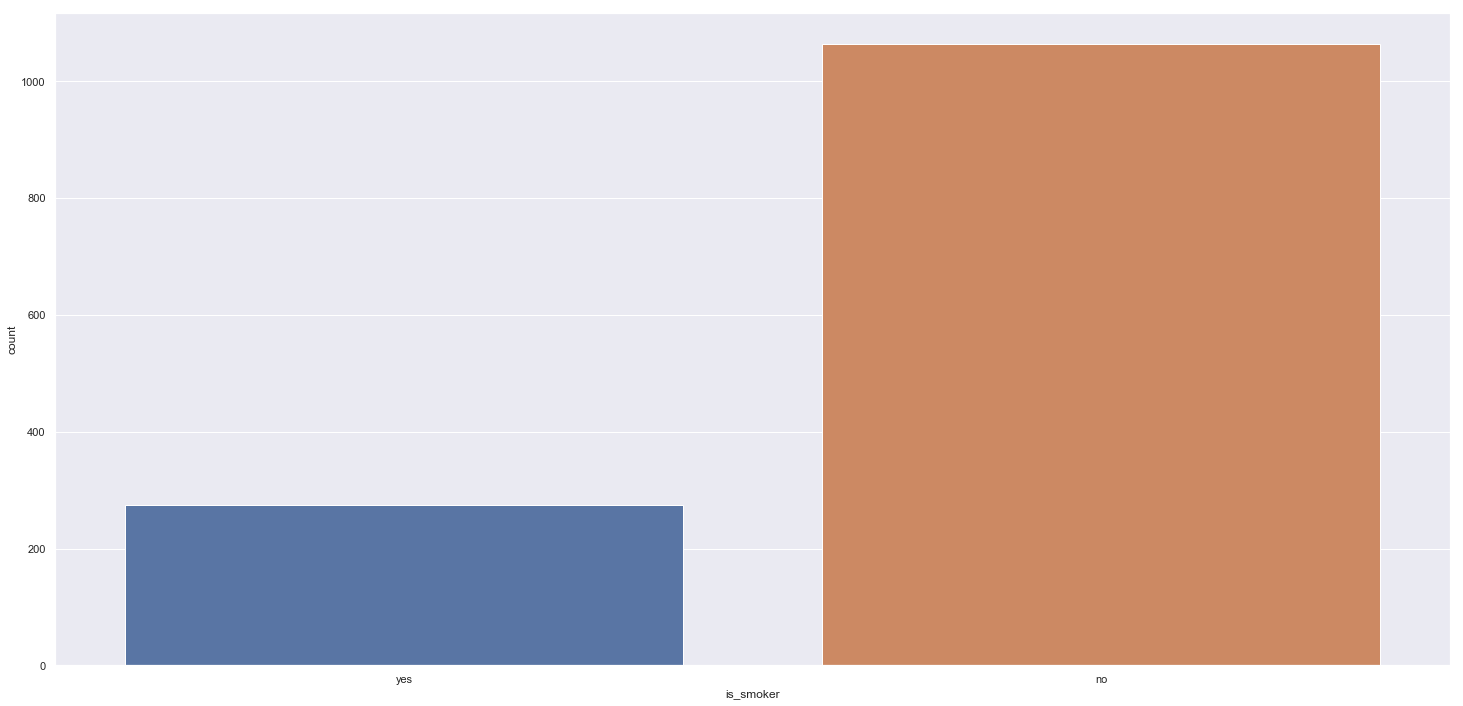

In [27]:
sns.countplot( x='is_smoker', data=df3 );

### 3.1.3.3. Region

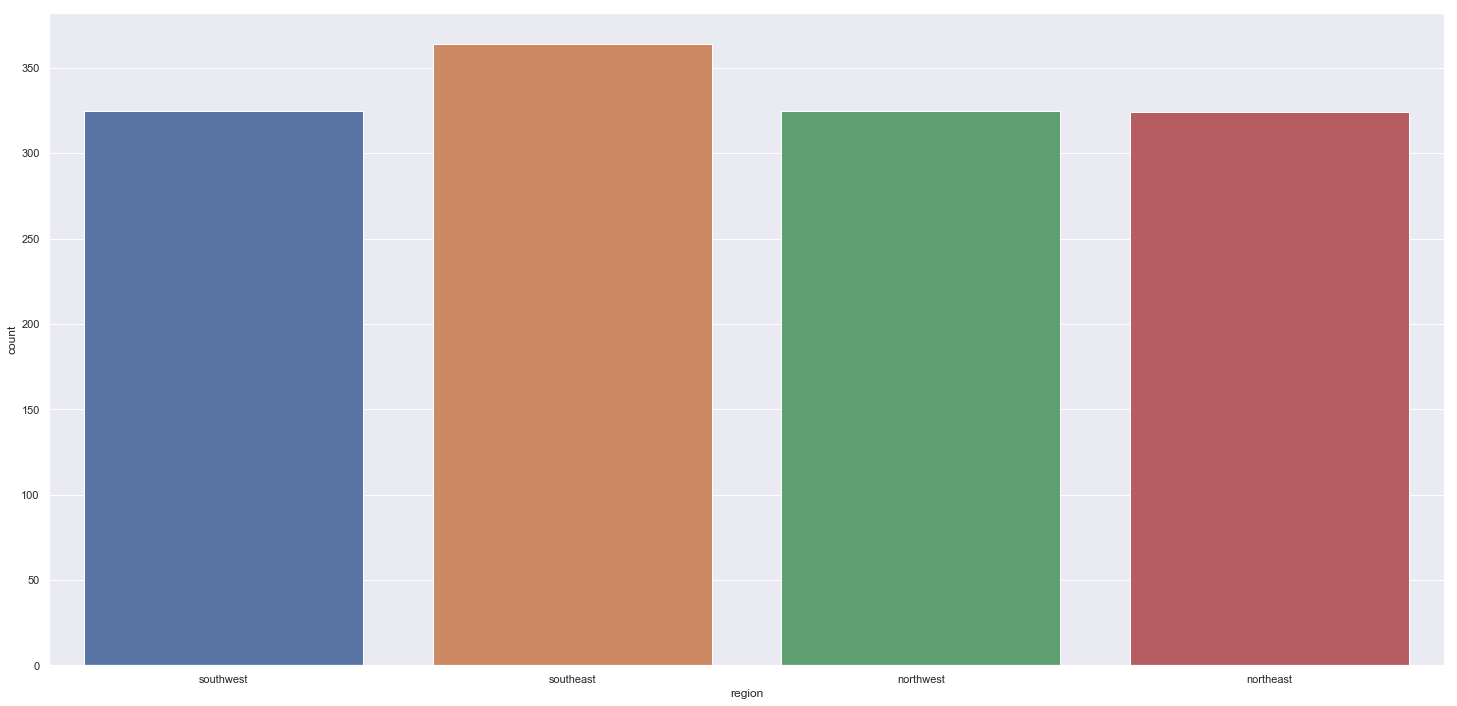

In [28]:
sns.countplot( x='region', data=df3 );

---
# <font color='red'> S02V03 - USING PLOTS FOR VISUALIZING DATA </font>
---

## 3.2.0. Bivariate Analysis

In [29]:
df3.head()

,age,gender,body_mass_index,num_children,is_smoker,region,insurance_cost
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## 3.2.1. Numerical Predictors

### 3.2.1.1. Insurance Cost x Age

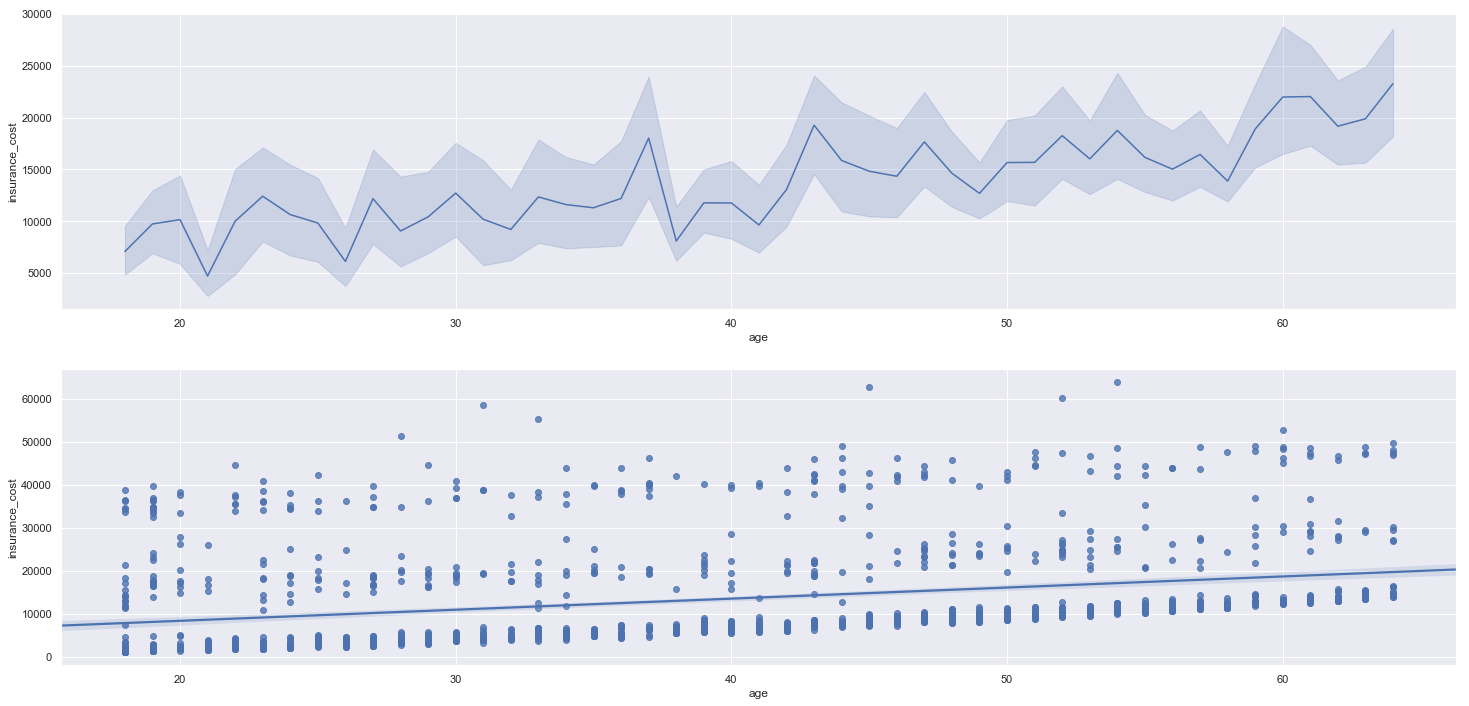

In [30]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='age', y='insurance_cost', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='age', y='insurance_cost', data=df3 );

### 3.2.1.2. Insurance Cost x Body Mass Index

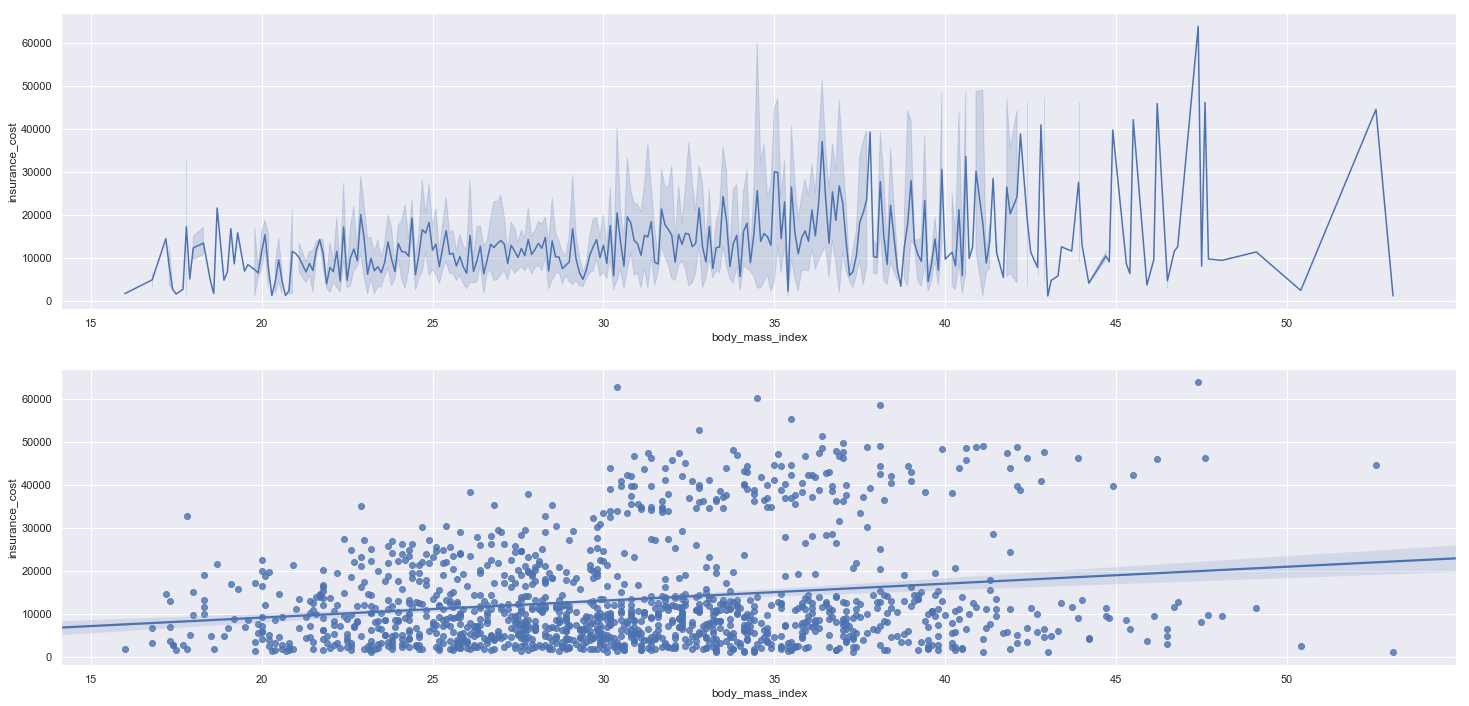

In [31]:
plt.subplot( 2, 1, 1 )
sns.lineplot( x='body_mass_index', y='insurance_cost', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='body_mass_index', y='insurance_cost', data=df3);

### 3.2.1.3. Insurance Cost x Number of Children

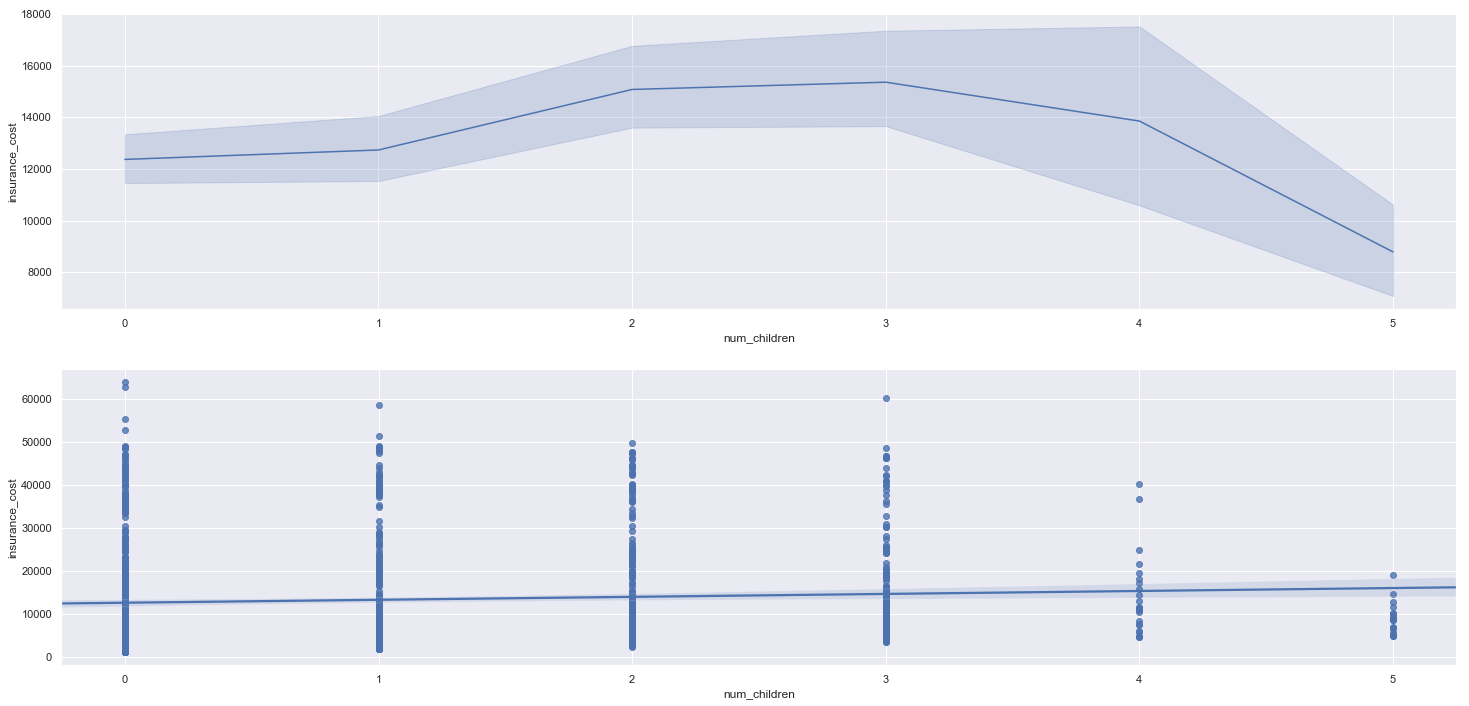

In [32]:
plt.subplot( 2, 1, 1)
sns.lineplot( x='num_children', y='insurance_cost', data=df3 );

plt.subplot( 2, 1, 2 )
sns.regplot( x='num_children', y='insurance_cost', data=df3 );

## 3.2.2. Categorical Predictors

### 3.2.2.1. Insurance Cost x Gender

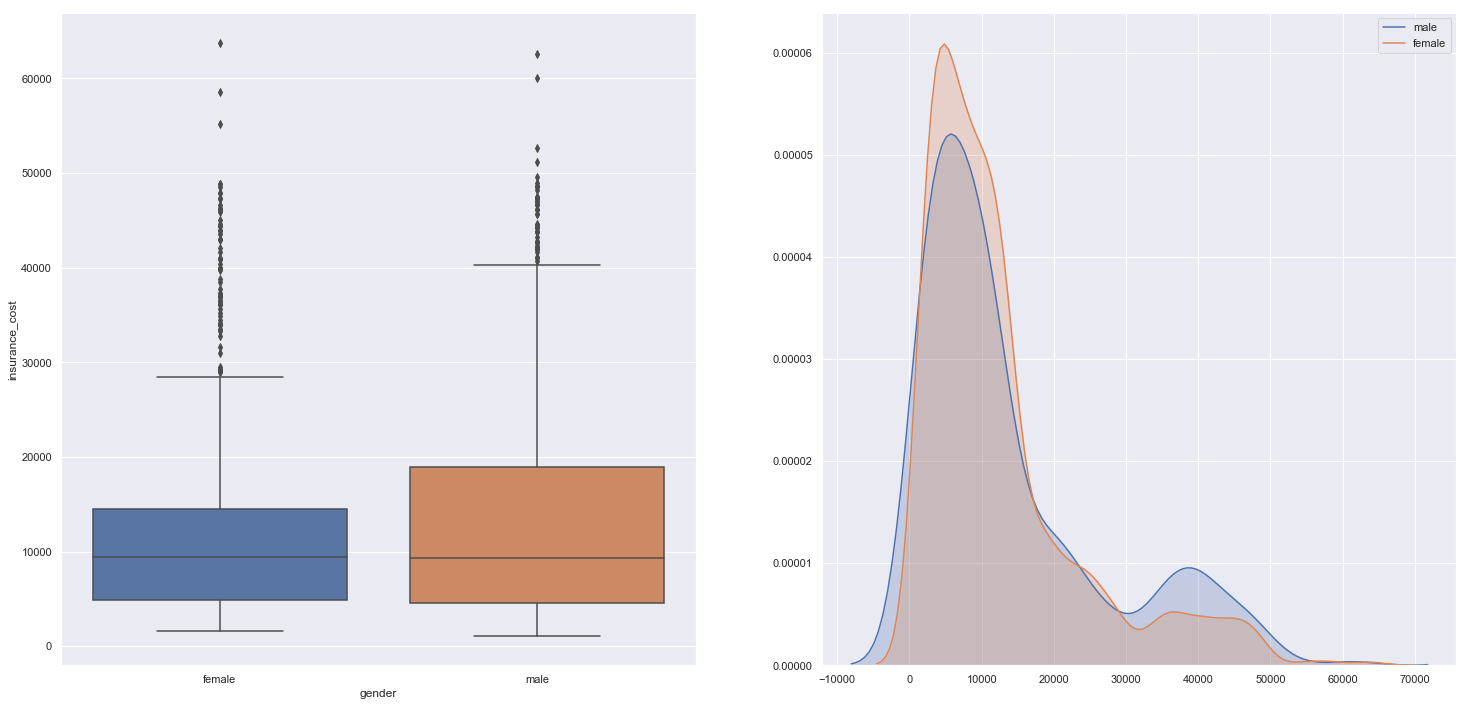

In [33]:
plt.subplot( 1, 2, 1 )
sns.boxplot( x='gender', y='insurance_cost', data=df3 );

plt.subplot( 1, 2, 2)
sns.kdeplot( df3[df3['gender'] == 'male']['insurance_cost'], label='male', shade=True );
sns.kdeplot( df3[df3['gender'] =='female']['insurance_cost'], label='female', shade=True );

### 3.2.2.2. Insurance Cost x Smoker

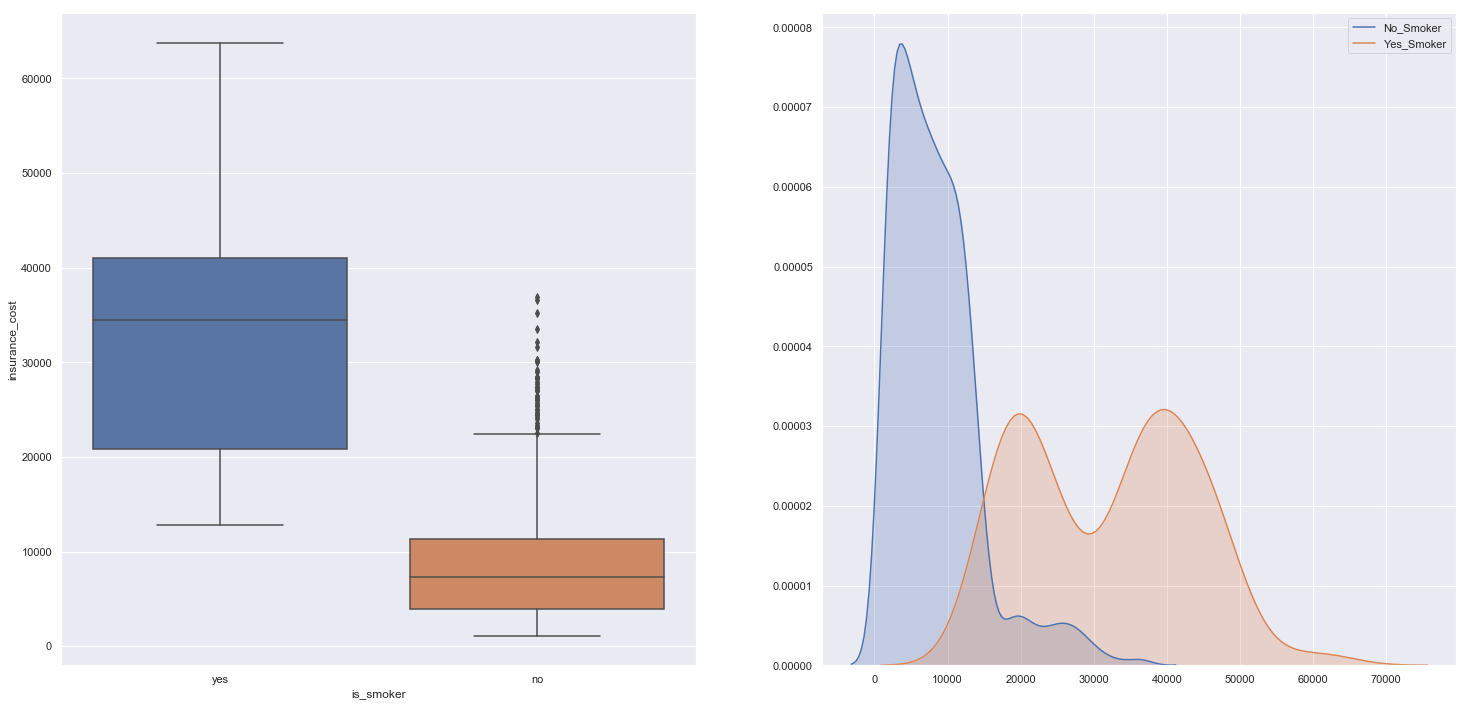

In [34]:
plt.subplot( 1, 2, 1 )
sns.boxplot( x='is_smoker', y='insurance_cost', data=df3 );

plt.subplot( 1, 2, 2)
sns.kdeplot( df3[df3['is_smoker'] == 'no']['insurance_cost'], label='No_Smoker', shade=True );
sns.kdeplot( df3[df3['is_smoker'] == 'yes']['insurance_cost'], label='Yes_Smoker', shade=True );

### 3.2.2.3. Insurance Cost x Region

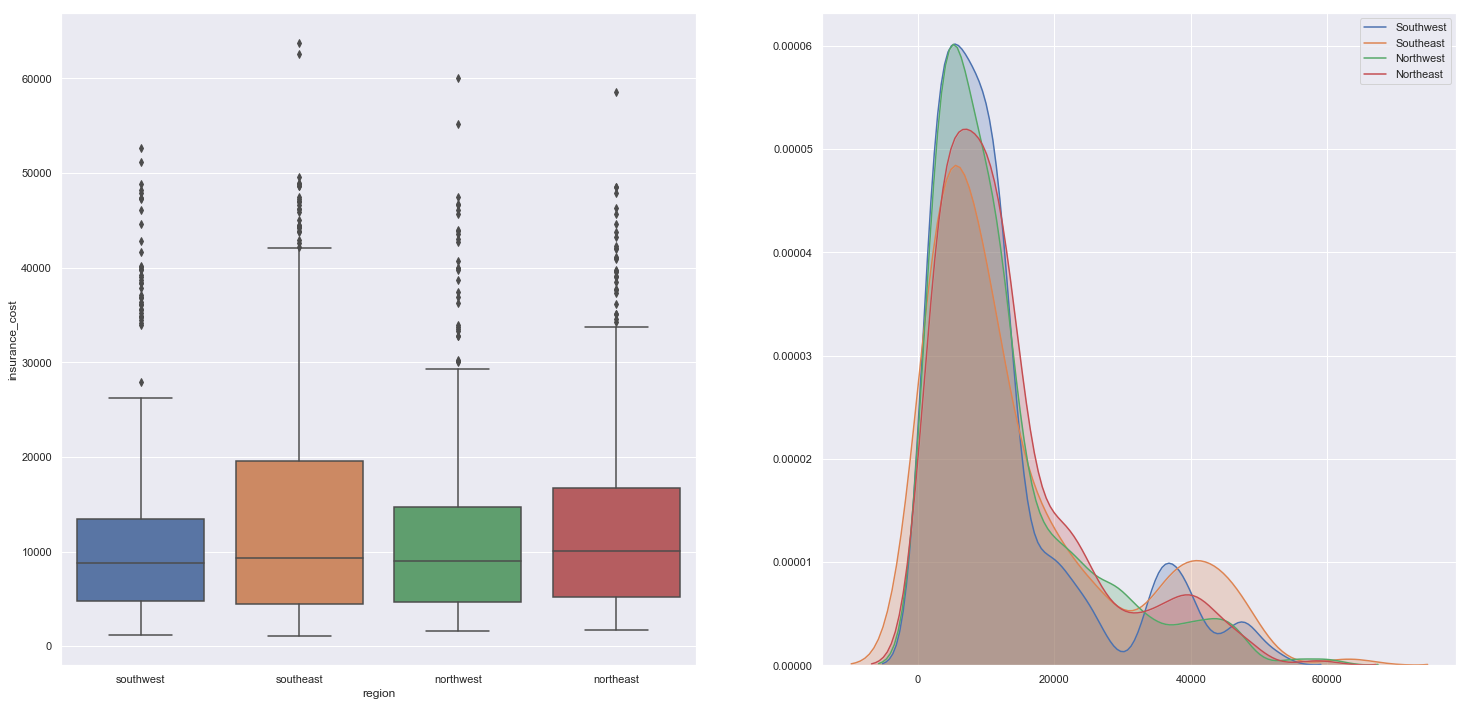

In [35]:
plt.subplot( 1, 2, 1 )
sns.boxplot( x='region', y='insurance_cost', data=df3 );

plt.subplot( 1, 2, 2)
sns.kdeplot( df3[df3['region'] == 'southwest']['insurance_cost'], label='Southwest', shade=True );
sns.kdeplot( df3[df3['region'] == 'southeast']['insurance_cost'], label='Southeast', shade=True );
sns.kdeplot( df3[df3['region'] == 'northwest']['insurance_cost'], label='Northwest', shade=True );
sns.kdeplot( df3[df3['region'] == 'northeast']['insurance_cost'], label='Northeast', shade=True );

## 3.3. Multivariate Analysis

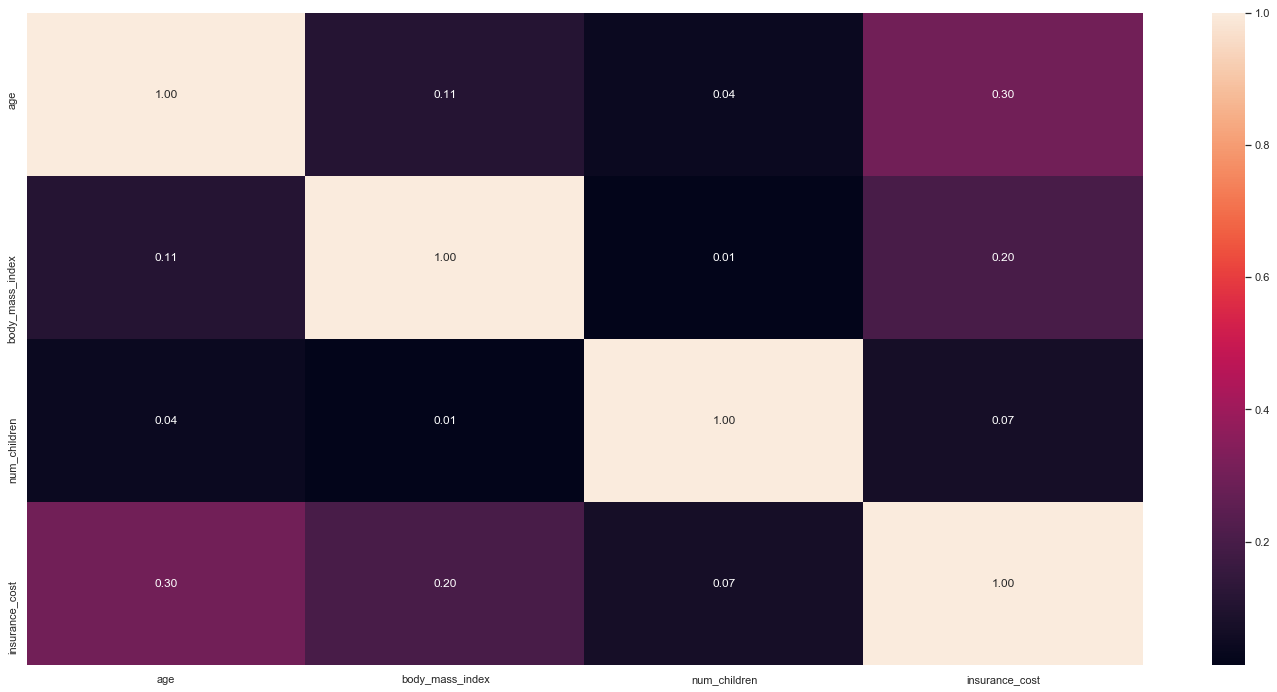

In [36]:
corr = num_attributes.corr()
sns.heatmap( corr, annot=True, fmt=".2f" )

plt.show()

---
# <font color='red'> S03V01 - DATA PREPROCESSING AND TRANSFORMATION </font>
---

# 4.0. Feature Engineering
---

In [37]:
df4 = df3.copy()

## 4.1. Features Creation

In [38]:
# BMI Chart
df4['bmi_cat']=df4['body_mass_index'].apply( lambda x: 'underweight' if x <=18 else 'healthy' if (x >=19)&(x <=24) else 'overweight' if (x >=25)&(x <=29) else 'obese' if (x >=30)&(x <= 39) else 'extremely_obese' ) 

# Label Encode BMI
df4['bmi_label'] = df4['bmi_cat'].apply( lambda x: -1 if x=='underweight' else 0 if x=='healthy' else 2 if x=='overweight' else 3 if x=='obese' else 4 ) 

# Average Insurance Cost per Region


## 4.2. Categorical Encoding

In [39]:
df4.head()

,age,gender,body_mass_index,num_children,is_smoker,region,insurance_cost,bmi_cat,bmi_label
0,19,female,27.9,0,yes,southwest,16884.92,overweight,2
1,18,male,33.8,1,no,southeast,1725.55,obese,3
2,28,male,33.0,3,no,southeast,4449.46,obese,3
3,33,male,22.7,0,no,northwest,21984.47,healthy,0
4,32,male,28.9,0,no,northwest,3866.86,overweight,2


### 4.2.1. Label Encoder

In [40]:
# Label Encode the column: Sex
le = LabelEncoder()
le.fit( df4['gender'].drop_duplicates() )
df4['gender_label'] = le.transform( df4['gender'] )
df4 = df4.rename( columns={'gender_label': 'is_male'} )

# Label Encode the column: Smoker
le.fit( df4['is_smoker'].drop_duplicates() )
df4['is_smoker'] = le.transform( df4['is_smoker'] )

# Label Encode the column: Region
le.fit( df4['region'].drop_duplicates() )
df4['region_label'] = le.transform( df4['region'] )

### 4.2.2. Dummy Encoder

In [41]:
# Dummy Encode the column: Region
d = pd.get_dummies( df4['region'] )
df4 = pd.concat( [df4, d], axis=1 )

# Dummy Encode the column: BMI_Label
d1 = pd.get_dummies( df4['bmi_cat'] )
df4 = pd.concat( [df4, d1], axis=1 )

In [42]:
df4.head()

,age,gender,body_mass_index,num_children,is_smoker,region,insurance_cost,bmi_cat,bmi_label,is_male,region_label,northeast,northwest,southeast,southwest,extremely_obese,healthy,obese,overweight,underweight
0,19,female,27.9,0,1,southwest,16884.92,overweight,2,0,3,0,0,0,1,0,0,0,1,0
1,18,male,33.8,1,0,southeast,1725.55,obese,3,1,2,0,0,1,0,0,0,1,0,0
2,28,male,33.0,3,0,southeast,4449.46,obese,3,1,2,0,0,1,0,0,0,1,0,0
3,33,male,22.7,0,0,northwest,21984.47,healthy,0,1,1,0,1,0,0,0,1,0,0,0
4,32,male,28.9,0,0,northwest,3866.86,overweight,2,1,1,0,1,0,0,0,0,0,1,0


### 4.2.3. Target Encoder

## 4.3. Response Variable Transformation

In [43]:
# Log Response Variables
df4['log_insurance_cost'] = np.log( df4['insurance_cost'] )

In [44]:
df4.head()

,age,gender,body_mass_index,num_children,is_smoker,region,insurance_cost,bmi_cat,bmi_label,is_male,region_label,northeast,northwest,southeast,southwest,extremely_obese,healthy,obese,overweight,underweight,log_insurance_cost
0,19,female,27.9,0,1,southwest,16884.92,overweight,2,0,3,0,0,0,1,0,0,0,1,0,9.734176
1,18,male,33.8,1,0,southeast,1725.55,obese,3,1,2,0,0,1,0,0,0,1,0,0,7.453301
2,28,male,33.0,3,0,southeast,4449.46,obese,3,1,2,0,0,1,0,0,0,1,0,0,8.400538
3,33,male,22.7,0,0,northwest,21984.47,healthy,0,1,1,0,1,0,0,0,1,0,0,0,9.998092
4,32,male,28.9,0,0,northwest,3866.86,overweight,2,1,1,0,1,0,0,0,0,0,1,0,8.260198


# 5.0 Data Preparation
---

In [45]:
df5 = df4.copy()

## 5.1. Standardizing ( Normal Distribution )

In [46]:
df5['body_mass_index_stand'] = ( df5['body_mass_index'] - df5['body_mass_index'].mean() ) / df5['body_mass_index'].std()

## 5.2. Normalization ( Rescaling  )

In [47]:
df5['age_res'] = ( df5['age'] -  df5['age'].min() ) / ( df5['age'].max() - df5['age'].min() )

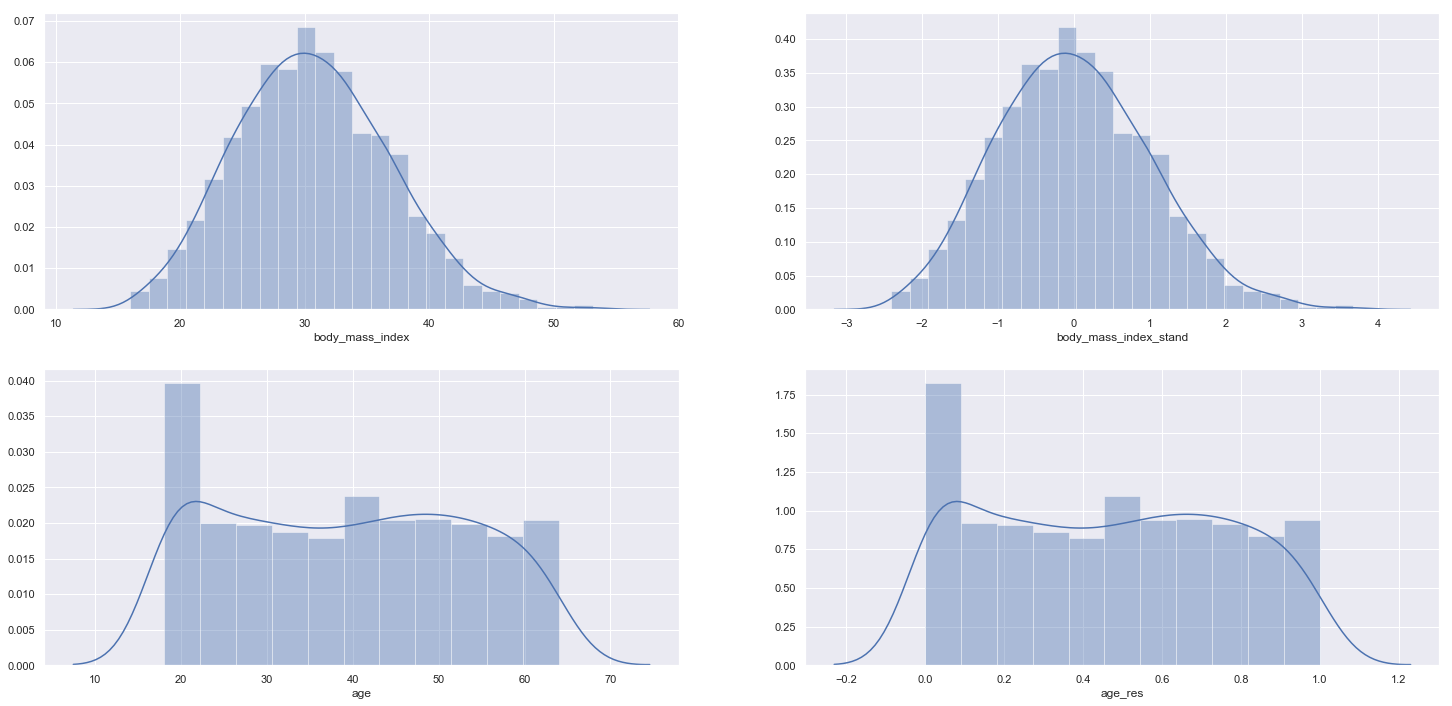

In [48]:
plt.subplot( 2, 2, 1)
sns.distplot( df5['body_mass_index'] )

plt.subplot( 2, 2, 2)
sns.distplot( df5['body_mass_index_stand'] )

plt.subplot( 2, 2, 3 )
sns.distplot( df5['age'] )

plt.subplot( 2, 2, 4 )
sns.distplot( df5['age_res'] )

# 6.0 Feature Selection
---

In [80]:
df6 = df5.drop( ['age', 'gender', 'body_mass_index', 'region', 'bmi_cat', 'insurance_cost'], axis=1 )

# Split the dataset in features and response attributes
X = df6.drop( 'log_insurance_cost', axis=1 )
y = df6['log_insurance_cost']

## 6.1. Univariate Selection

### 6.1.1 Correlation Matrix

is_smoker             0.665506
log_insurance_cost    1.000000
age_res               0.527834
Name: log_insurance_cost, dtype: float64


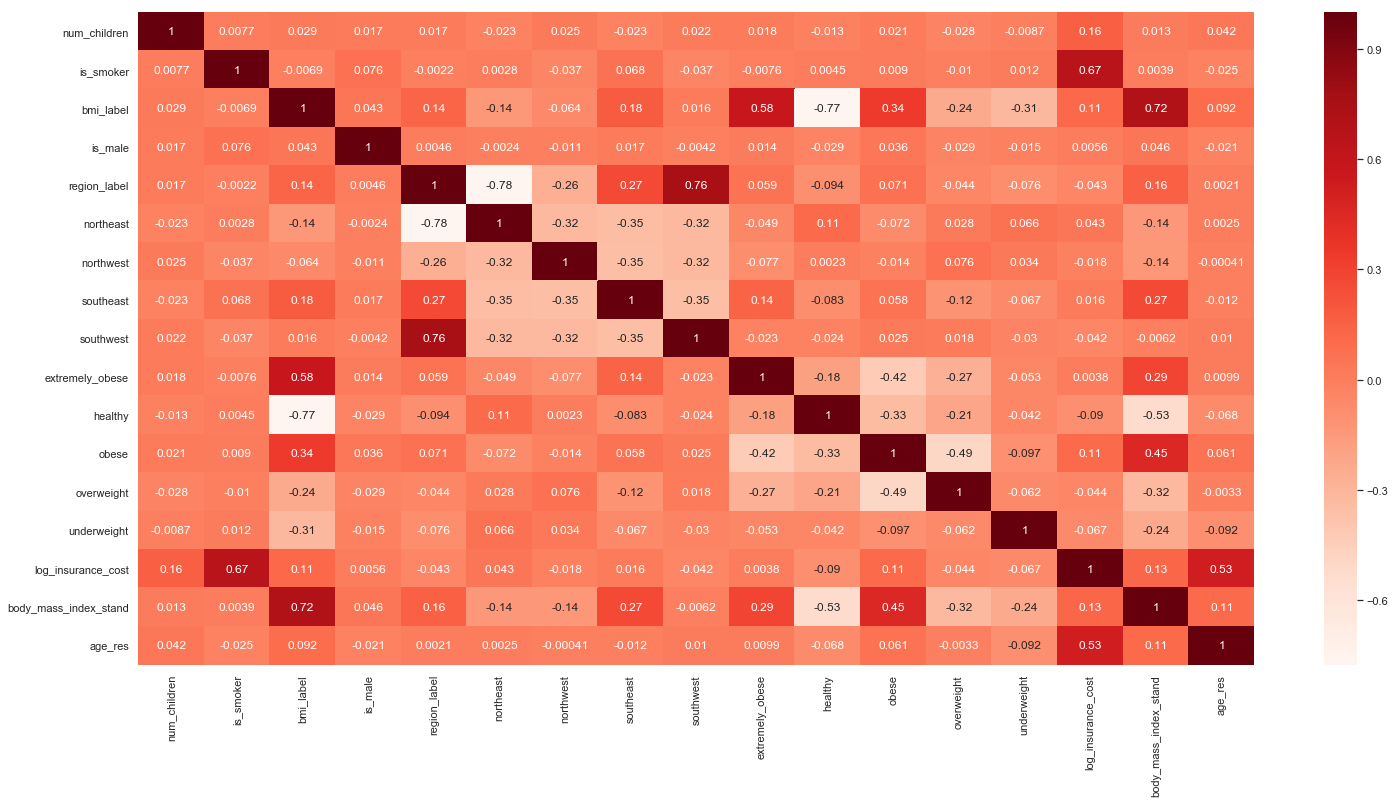

In [81]:
#Correlation with output variable
cor = df6.corr()
cor_target = abs(cor["log_insurance_cost"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print( relevant_features )

#Using Pearson Correlation
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 6.1.2. Select K Best

In [82]:
selector = SelectKBest( f_regression, k=5 ).fit( X, y )
X_new = selector.transform( X )
feat_selected = X.columns[selector.get_support(indices=True)].tolist()

print( feat_selected )

# New dataset with selected columns
data = df6[df6.columns.intersection( feat_selected )]

data.head()

['num_children', 'is_smoker', 'bmi_label', 'body_mass_index_stand', 'age_res']


,num_children,is_smoker,bmi_label,body_mass_index_stand,age_res
0,0,1,2,-0.453130,0.021739
1,1,0,3,0.514359,0.000000
2,3,0,3,0.383174,0.217391
3,0,0,0,-1.305833,0.326087
4,0,0,2,-0.289149,0.304348


### 6.1.2. Select Percentile

In [83]:
selector = SelectPercentile( f_regression, percentile=70 ).fit( X, y )
X_new = selector.transform( X )
feat_selected = X.columns[selector.get_support(indices=True)].tolist()

print( feat_selected )

# New dataset with selected columns
data = df6[df6.columns.intersection( feat_selected )]

data.head()

['num_children', 'is_smoker', 'bmi_label', 'region_label', 'northeast', 'healthy', 'obese', 'overweight', 'underweight', 'body_mass_index_stand', 'age_res']


,num_children,is_smoker,bmi_label,region_label,northeast,healthy,obese,overweight,underweight,body_mass_index_stand,age_res
0,0,1,2,3,0,0,0,1,0,-0.453130,0.021739
1,1,0,3,2,0,0,1,0,0,0.514359,0.000000
2,3,0,3,2,0,0,1,0,0,0.383174,0.217391
3,0,0,0,1,0,1,0,0,0,-1.305833,0.326087
4,0,0,2,1,0,0,0,1,0,-0.289149,0.304348


## 6.2. RFE Selection ( Recursive Feature Elimination )

In [84]:
# Choose the number of features
# no of features
nof_list=np.arange( 1, X.shape[1] )            
high_score=0

nof=0           
score_list =[]
alpha = 0.05
for n in range( len( nof_list ) ):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0 )
    
    model = linear_model.Ridge( alpha=alpha )
    rfe = RFE( model, nof_list[n] )
    
    X_train_rfe = rfe.fit_transform( X_train, y_train )
    X_test_rfe = rfe.transform( X_test )
    
    model.fit( X_train_rfe, y_train )
    
    score = model.score( X_test_rfe, y_test )
    score_list.append( score )
    
    if( score > high_score ):
        high_score = score
        nof = nof_list[n]
        
print( "Optimum number of features: {}".format( nof ) )
print( "Score with {} features: {}".format(  nof, high_score ) )

# -----------------------------------------------------------------------------------
# Take the selected attributes
# -----------------------------------------------------------------------------------
cols = list( X.columns )
model = linear_model.Ridge( alpha=alpha )

# Initializing RFE model
rfe = RFE( model, nof )
X_rfe = rfe.fit_transform( X, y )  

# Fitting the data to model
model.fit( X_rfe, y )

temp = pd.Series( rfe.support_, index = cols )
selected_features_rfe = temp[ temp == True ].index.to_list()
print( '\n Selected Features')
print( selected_features_rfe )

# Selected the data according to feature selection
data = df6[df6.columns.intersection( selected_features_rfe )]
data['log_insurance_cost'] = y

Optimum number of features: 14
Score with 14 features: 0.783112256219955

 Selected Features
['num_children', 'is_smoker', 'bmi_label', 'is_male', 'region_label', 'northeast', 'southeast', 'southwest', 'extremely_obese', 'healthy', 'obese', 'underweight', 'body_mass_index_stand', 'age_res']


## 6.3. Embedded Method

Best alpha using built-in LassoCV: 0.000997
Best score using built-in LassoCV: 0.770016

Lasso picked 11 variables and eliminated the other 5 variables


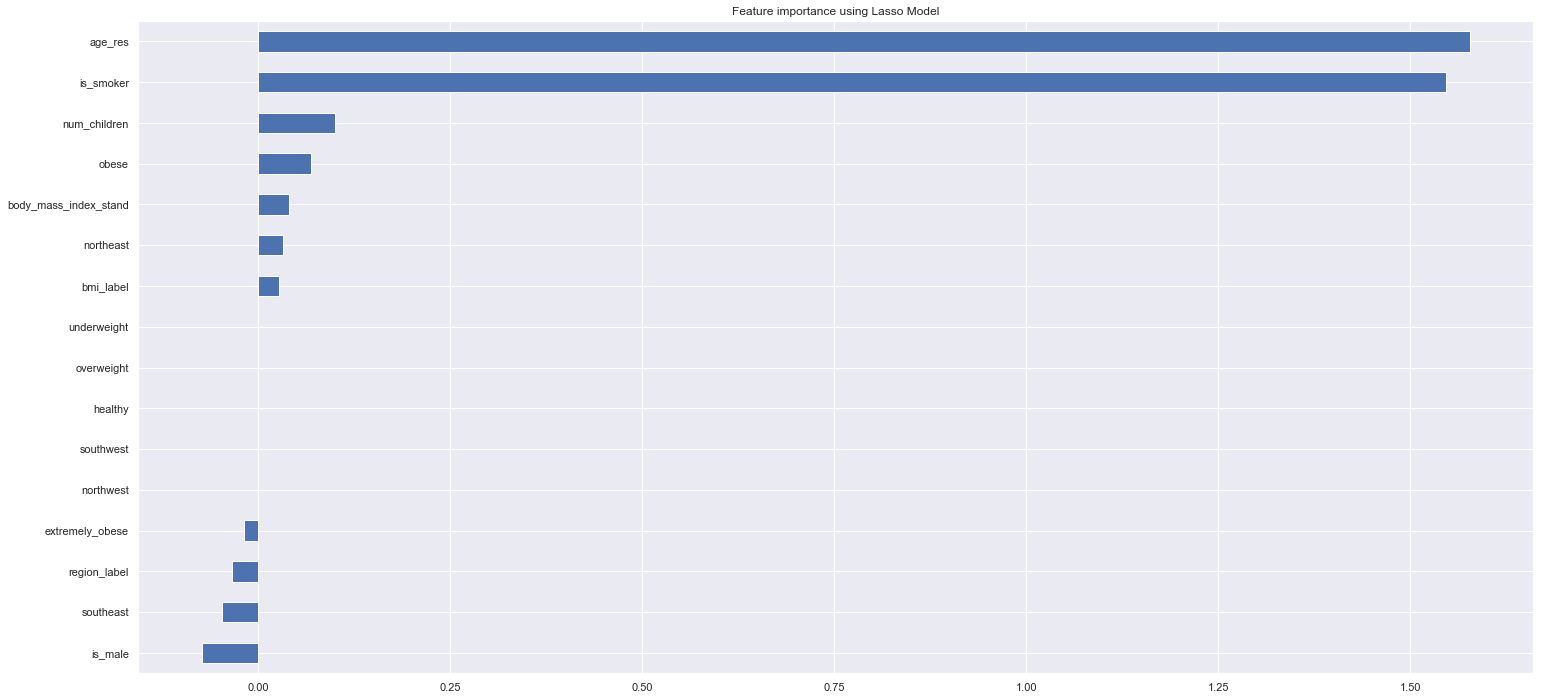

In [85]:
# Linear Regression - Lasso CV Regularization
reg = linear_model.LassoCV()

reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f\n" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

# Plot Importances
imp_coef.plot(kind = "barh")
plt.title( "Feature importance using Lasso Model" );

In [86]:
feat = list( coef[coef != 0].index )

#data = df6[df6.columns.intersection( feat )]
#data['log_insurance_cost'] = y

## 6.4. Manual Selection

In [87]:
#data = df6[['age_res', 'is_male', 'body_mass_index_stand', 'num_children', 'is_smoker', 'northeast', 'northwest', 'southeast', 'southwest', 'log_insurance_cost']]

## 6.5. Final dataset for training

In [88]:
#data = data.drop( ['northeast', 'southeast', 'southwest', 'extremely_obese', 'healthy', 'obese', 'underweight', 'bmi_label'], axis=1 )
data.head()

,num_children,is_smoker,bmi_label,is_male,region_label,northeast,southeast,southwest,extremely_obese,healthy,obese,underweight,body_mass_index_stand,age_res,log_insurance_cost
0,0,1,2,0,3,0,0,1,0,0,0,0,-0.453130,0.021739,9.734176
1,1,0,3,1,2,0,1,0,0,0,1,0,0.514359,0.000000,7.453301
2,3,0,3,1,2,0,1,0,0,0,1,0,0.383174,0.217391,8.400538
3,0,0,0,1,1,0,0,0,0,1,0,0,-1.305833,0.326087,9.998092
4,0,0,2,1,1,0,0,0,0,0,0,0,-0.289149,0.304348,8.260198


# 7.0 Modelling
---

## 7.0.1. Split Data into Train and Test Sets

In [89]:
X = data.drop( 'log_insurance_cost', axis=1 )
y = data['log_insurance_cost']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

## 7.1. Average Model

In [90]:
# Prediction
pred_avg = np.repeat( np.mean( y_train ), len( y_test ), axis=0 )

# Performance
mse = metrics.mean_squared_error( np.exp( y_test ), np.exp( pred_avg ) )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( np.exp( y_test ), np.exp( pred_avg ) )
rsquared = metrics.r2_score( np.exp( y_test ), np.exp( pred_avg ) )

print( 'RMSE: {}\n'.format( rmse ) )
print( 'MAE: {}\n'.format( mae ) )
print( 'R2: {}\n'.format( rsquared ) )

# Evaluation
X_test_avg = X_test.copy()
X_test_avg['insurance_cost'] = y_test
X_test_avg['prediction'] = pred_avg
X_test_avg['error'] = X_test_avg['insurance_cost'] - X_test_avg['prediction']


avg_results = pd.DataFrame( {'Model': 'Avg Model', 'RMSE': rmse, 'MAE':mae, 'R2': rsquared}, index=[0]  )
print( avg_results )

RMSE: 13486.7839015818

MAE: 8779.933066144065

R2: -0.1227236323879124

       Model          RMSE          MAE        R2
0  Avg Model  13486.783902  8779.933066 -0.122724


## 7.2. Linear Regression

In [91]:
# sklearn
lm = linear_model.LinearRegression().fit( X_train, y_train ) 

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_lm = lm.predict( X_test )

# Performance
mse = metrics.mean_squared_error( np.exp( y_test ), np.exp( pred_lm ) )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( np.exp( y_test ), np.exp( pred_lm ) )
rsquared = metrics.r2_score( np.exp( y_test ), np.exp( pred_lm ) )

print( 'RMSE: {}\n'.format( rmse ) )
print( 'MAE: {}\n'.format( mae ) )
print( 'R2: {}\n'.format( rsquared ) )

lm_results = pd.DataFrame( {'Model':'Linear Regression', 'RMSE': rmse, 'MAE':mae, 'R2':rsquared }, index=[0] )
print( lm_results )


Performance
RMSE: 8328.518811865788

MAE: 4213.399694094723

R2: 0.5718542783394406

               Model         RMSE          MAE        R2
0  Linear Regression  8328.518812  4213.399694  0.571854


## 7.3. Regularized Linear Regression - LASSO

In [92]:
# sklearn
lasso = linear_model.Lasso( alpha=0.04 ).fit( X_train, y_train ) 

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_lasso = lasso.predict( X_test )

# Performance
mse = metrics.mean_squared_error( np.exp( y_test ), np.exp( pred_lasso ) )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( np.exp( y_test ), np.exp( pred_lasso ) )
rsquared = metrics.r2_score( np.exp( y_test ), np.exp( pred_lasso ) )

print( 'RMSE: {}'.format( rmse ) )
print( 'MAE: {}'.format( mae ) )
print( 'R2: {}\n'.format( rsquared ) )

lasso_results = pd.DataFrame( {'Model':' Lasso Linear Regression', 'RMSE': rmse, 'MAE': mae, 'R2': rsquared}, index=[0] )
print( lasso_results )


Performance
RMSE: 7156.915121431356
MAE: 3979.4046947051384
R2: 0.6838393615937367

                      Model         RMSE          MAE        R2
0   Lasso Linear Regression  7156.915121  3979.404695  0.683839


## 7.4. Random Forest

In [96]:
# sklearn
rf = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=0 ).fit( X_train, y_train ) 

# -------------------------------------------------
# Evaluation
# -------------------------------------------------
print( '\nPerformance')

# Prediction 
pred_rf = rf.predict( X_test )

# Performance
mse = metrics.mean_squared_error( np.exp( y_test ), np.exp( pred_rf ) )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( np.exp( y_test ), np.exp( pred_rf ) )
rsquared = metrics.r2_score( np.exp( y_test ), np.exp( pred_rf ) )


print( 'RMSE: {}'.format( rmse ) )
print( 'MAE: {}'.format( mae ) )
print( 'R2: {}\n'.format( rsquared ) )

rf_results = pd.DataFrame( {'Model':'Random Forest', 'RMSE': rmse, 'MAE': mae, 'R2': rsquared }, index=[0] )
print( rf_results )


Performance
RMSE: 4395.632507093345
MAE: 2063.036762421389
R2: 0.8807388975977809

           Model         RMSE          MAE        R2
0  Random Forest  4395.632507  2063.036762  0.880739


## 7.5. Polynomial Regression

In [97]:
# Polynomial
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform( X_train )
X_test_poly = poly_features.fit_transform( X_test )

# Linear Regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit( X_train_poly, y_train )

# Prediction
pred_poly = lin_reg.predict( X_test_poly )


# Performance
mse = metrics.mean_squared_error( np.exp( y_test ), np.exp( pred_poly ) )
rmse = np.sqrt( mse )
mae = metrics.mean_absolute_error( np.exp( y_test ), np.exp( pred_poly ) )
rsquared = metrics.r2_score( np.exp( y_test ), np.exp( pred_poly ) )


print( 'RMSE: {}'.format( rmse ) )
print( 'MAE: {}'.format( mae ) )
print( 'R2: {}\n'.format( rsquared ) )

poly_results = pd.DataFrame( {'Model':'Polynomial Regression', 'RMSE': rmse, 'MAE': mae, 'R2': rsquared }, index=[0] )
print( poly_results )


RMSE: 4929.430102941673
MAE: 2576.53485424886
R2: 0.8500144250224744

                   Model         RMSE          MAE        R2
0  Polynomial Regression  4929.430103  2576.534854  0.850014


---
# 7. Results
---

In [98]:
a = pd.concat( [avg_results, lm_results, lasso_results, rf_results, poly_results], axis=0 )
a.sort_values( 'RMSE' )

,Model,RMSE,MAE,R2
0,Random Forest,4395.632507,2063.036762,0.880739
0,Polynomial Regression,4929.430103,2576.534854,0.850014
0,Lasso Linear Regression,7156.915121,3979.404695,0.683839
0,Linear Regression,8328.518812,4213.399694,0.571854
0,Avg Model,13486.783902,8779.933066,-0.122724


# 8.0. Training
---

In [99]:
df8 = data.copy()

## 8.1. K-Fold Cross-Validation

In [100]:
def run_model( model, X_test, y_test):
    # model prediction
    pred = model.predict( X_test )
    
    # model performance
    rmse = np.sqrt( metrics.mean_squared_error( np.exp( y_test ), np.exp( pred ) ) )
    r2 = metrics.r2_score( np.exp( y_test ), np.exp( pred ) )
    
    return rmse, r2

In [108]:
# dataset
X = df8.drop( 'log_insurance_cost', axis=1 )
y = df8['log_insurance_cost']

# K-fold cross-validation
k = 10
cv = KFold( n_splits=k, random_state=42, shuffle=False)

# empty list for each model
lm_rmse_score = []
lm_r2_score = []

rf_rmse_score = []
rf_r2_score = []

poly_rmse_score = []
poly_r2_score = []

# Iterate over folds
for train_index, test_index in cv.split( X ):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    # Model fit
    ## Linear Regression 
    lm_model = linear_model.LinearRegression().fit( X_train, y_train )
    rmse, r2 = run_model( lm_model, X_test, y_test )
    
    lm_rmse_score.append( rmse )
    lm_r2_score.append( r2 )
    
    
    ## Random Forest Regressor
    rf_model = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=0 ).fit( X_train, y_train ) 
    rmse, r2 = run_model( rf_model, X_test, y_test )
    
    rf_rmse_score.append( rmse )
    rf_r2_score.append( r2 )
    
    ## Polynomial Regressor
    poly_features = PolynomialFeatures(degree = 2)

    X_train_poly = poly_features.fit_transform( X_train )
    X_test_poly = poly_features.fit_transform( X_test )
    poly_model = linear_model.LinearRegression().fit( X_train_poly, y_train )
    rmse, r2 = run_model( poly_model, X_test_poly, y_test )
    
    
    poly_rmse_score.append( rmse )
    poly_r2_score.append( r2 )
    
    
print( 'LR RMSE CV: {} +/- {}'.format( np.round( np.mean( lm_rmse_score ), 0 ), np.round( np.std( lm_rmse_score ), 0 ) ) )
print( 'LR R2 CV: {} +/- {}\n'.format( np.round( np.mean( lm_r2_score ), 2 ), np.round( np.std( lm_r2_score ), 2 ) ) )

print( 'RF RMSE CV: {} +/- {}'.format( np.round( np.mean( rf_rmse_score ), 0 ), np.round( np.std( rf_rmse_score ), 0 ) ) )
print( 'RF R2 CV: {} +/- {}\n'.format( np.round( np.mean( rf_r2_score ), 2 ), np.round( np.std( rf_r2_score ), 2 ) ) )

print( 'Poly RMSE CV: {} +/- {}'.format( np.round( np.mean( poly_rmse_score ), 0 ), np.round( np.std( poly_rmse_score ), 0 ) ) )
print( 'Poly R2 CV: {} +/- {}\n'.format( np.round( np.mean( poly_r2_score ), 2 ), np.round( np.std( poly_r2_score ), 2 ) ) )

LR RMSE CV: 8359.0 +/- 1042.0
LR R2 CV: 0.51 +/- 0.1

RF RMSE CV: 4616.0 +/- 663.0
RF R2 CV: 0.85 +/- 0.05

Poly RMSE CV: 7616.0 +/- 7398.0
Poly R2 CV: 0.32 +/- 1.46



### 6.1.2. Leave One Out Cross-Validation

# 9.0. Random Forest Fine Tunning 
---

## 9.1. Parameters for tunning

In [109]:
# Number of Trees
n_estimators = [ int( x ) for x in np.linspace( start=100, stop=300, num=100 ) ]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Max number of levels in tree
max_depth = [ int( x ) for x in np.linspace( start=10, stop=110, num=1 ) ]
max_depth.append( None )

# Minimum number of samples required to split a note
min_samples_split = [2, 5, 7, 10, 15]

# Minimum number of samples required to each leaf node
min_samples_leaf = [1, 2, 4, 7, 11]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Random grid
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap }

## 9.2. Random Search Training

In [111]:
df9 = df8.copy()

X = df9.drop( 'log_insurance_cost', axis=1 )
y = df9['log_insurance_cost']

In [ ]:
# Random forest regressor
rf = RandomForestRegressor( random_state=42, n_jobs=-1 )

# Split training/test
cv = Split( n_splits=3)

# Cross-Validation
rf_random = RandomizedSearchCV( estimator=rf, param_distributions=random_grid, n_iter=100, cv=cv, verbose=3, random_state=42, n_jobs=-1 )

# Fit the random search model
rf_random.fit( x_train, y_train )

# Print best parameters from random search
rf_random.fit( X_train, y_train )